(1000, 64, 64)


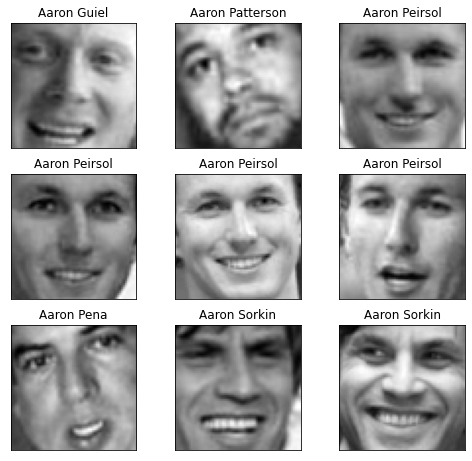

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

import os 
dir='lfwcrop_grey/faces'
photos=os.listdir(dir)[1:1001]
images=[dir+'/' + photo for photo in photos]
images=np.array([plt.imread(image) for image in images], dtype=np.float64)
names=[name[:name.find('0')-1].replace("_", " ") for name in photos]
n_samples, h, w = images.shape
print(images.shape)
plot_portraits(images, names, h, w, n_row=3, n_col=3)


In [11]:
n_components = 300
X = images.reshape(n_samples, h*w)
mean = np.mean(X, axis=0)
centered_data = X-mean
cov_mat = np.cov(centered_data, rowvar = False)

eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print(eigenvector_subset.shape)



(4096, 300)


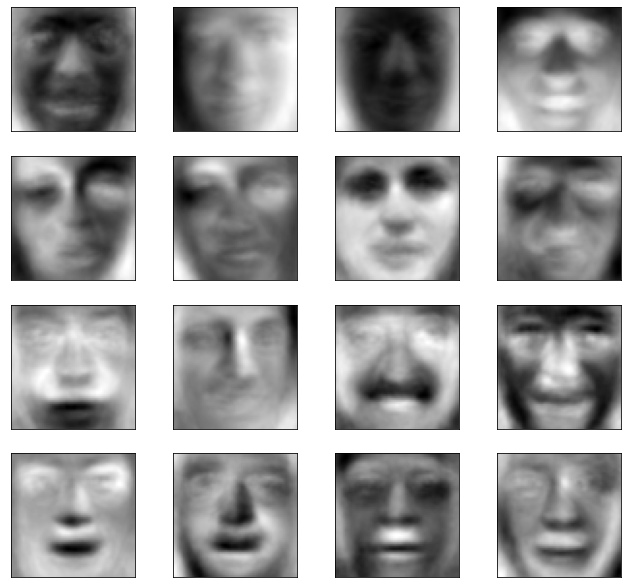

In [12]:
plt.figure(figsize=(2.2 * 4, 2.2 * 4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
for i in range(4 * 4):
    plt.subplot(4, 4, i + 1)
    plt.imshow(eigenvector_subset.T[i].reshape(64,64), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

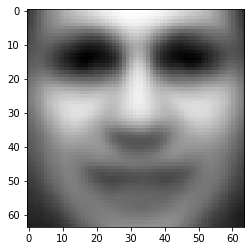

In [13]:
plt.imshow(mean.reshape(64, 64), cmap=plt.cm.gray )

In [14]:
x_reduced = np.dot(eigenvector_subset.transpose(),X.transpose()).transpose()
print(x_reduced.shape)


(1000, 300)


(-0.5, 63.5, 63.5, -0.5)

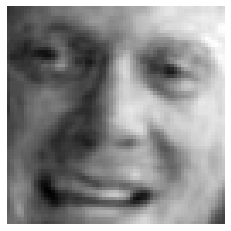

In [15]:
temp= np.matmul(eigenvector_subset,x_reduced[0])
temp.shape
temp=temp.real
plt.imshow(temp.reshape(64,64) , cmap= 'gray')
plt.axis('off')